In [1]:
from notebooks.wandb_ds import *
from ast import literal_eval as make_tuple
import numpy as np

gridsizes_ds = get_runs_as_dataset("gridsizes_16")

In [2]:
order = [(2, 2, 2), (3, 3, 3), (4, 4, 4), (5, 5, 5), (6, 6, 6), (7, 7, 7), (8, 8, 8), (9, 9, 9), (10, 10, 10)]
results = {"GOMEA": {x : None for x in order}, "GOMEA-partial": {x : None for x in order}}

for group, runs in gridsizes_ds.groupby(["OptimizerName", "MeshSize"]):
    it_times = runs[0].resolutions_train[0]["time[ms]"]
    if len(it_times) < 500:
        results[group[0]][group[1]] = it_times.mean() * 500
    else:
        results[group[0]][group[1]] = it_times.sum()

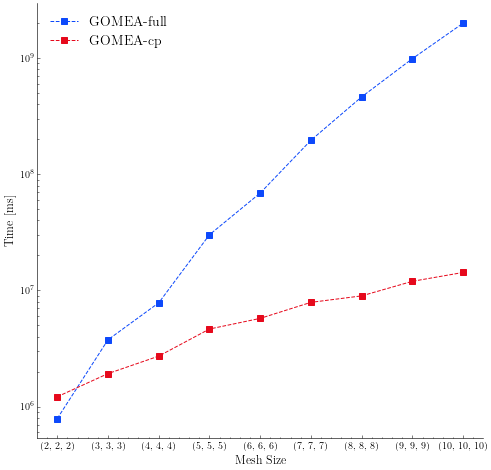

In [3]:
plt.figure(figsize=(8,8))
plt.plot(results["GOMEA"].values(), '--s', label="GOMEA-full")
plt.plot(results["GOMEA-partial"].values(),  '--s', label="GOMEA-cp")
plt.xticks([i for i in range(len(order))], order)
plt.yscale("log")
plt.legend(prop={'size': 14})
plt.xlabel("Mesh Size", fontsize=12)
plt.ylabel("Time [ms]", fontsize=12)
plt.savefig(IMG_DIR / "gridsizes_time.pdf")

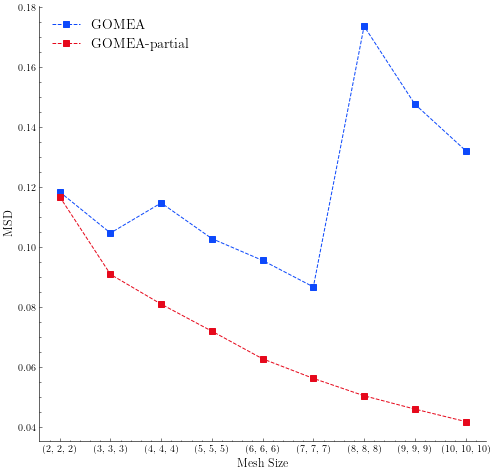

In [100]:
results_metric = gridsizes_ds.aggregate(["OptimizerName", "MeshSize"])
results_metric = results_metric.reset_index(drop=True)
results_metric.MeshSize = results_metric.MeshSize.map(lambda x: list(make_tuple(x)))
results_metric.sort_values(by="MeshSize", inplace=True)

plt.figure(figsize=(8,8))

for optim in results_metric.OptimizerName.unique():
    df = results_metric.loc[results_metric.OptimizerName == optim]
    plt.plot(df.metric.values, '--s', label=optim)

plt.legend(prop={'size': 14})
plt.xticks([i for i in range(len(order))], order)
plt.xlabel("Mesh Size", fontsize=12)
plt.ylabel("MSD", fontsize=12)

# plt.savefig(IMG_DIR / "gridsizes_metric.pdf")